## Import libraries

In [1]:
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.model_selection import train_test_split 
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [19]:
#import functions
import sys

# Add the directory containing your file to Python's search path
sys.path.append(r'C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\sonorus all')

# Now you can import the function from the file
from Model_evaluation import model_evaluation
from wavenet import wavenet_train, prep_data

## Load data

In [4]:
#get nuie data
specs_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\specs segmented.npy")
outcome_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\outcome segmented.npy")
#get physionet data
specs_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\sonorus - physionet data\Preprocessed data\Segmented\specs_segmented.npy")
outcome_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - physionet data\Preprocessed data\Segmented\outcomes_segmented.npy")

In [5]:
#join both datasets
#pad zeroes to nuie data 
specs_nuie_padded = np.zeros((specs_nuie.shape[0],specs_physionet.shape[1],specs_physionet.shape[2]))
specs_nuie_padded[:specs_nuie.shape[0],:specs_nuie.shape[1],:specs_nuie.shape[2]] = specs_nuie


In [22]:
outcome_nuie.shape

(7740, 128, 40)

In [6]:
#join both datasets
#pad zeroes to nuie data outcome
outcome_nuie_padded = np.zeros((outcome_nuie.shape[0],outcome_physionet.shape[1]))
outcome_nuie_padded[:outcome_nuie.shape[0],:outcome_nuie.shape[1]] = outcome_nuie


In [7]:
#concatenate
specs = np.concatenate((specs_nuie_padded,specs_physionet),axis=0)
outcome = np.concatenate((outcome_nuie_padded,outcome_physionet),axis=0)

## Split data

In [8]:
#splitting the data into training and testing
specs_train, specs_test, outcomes_train, outcomes_test = train_test_split(specs, outcome, test_size=0.2, random_state=42)

## Model

In [9]:
specs_train, specs_test = prep_data(specs_train, specs_test)

In [10]:
#model
wavenet = wavenet_train(specs_train, specs_test, outcomes_train, outcomes_test)

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:359: UserWarning: `build()` was called on layer 'wave_net_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/3
6291/6291 ━━━━━━━━━━━━━━━━━━━━ 5994s 952ms/step - accuracy: 0.6523 - loss: 0.8413 - val_accuracy: 0.6547 - val_loss: 0.6384
Epoch 2/3
6291/6291 ━━━━━━━━━━━━━━━━━━━━ 5872s 933ms/step - accuracy: 0.6789 - loss: 0.6008 - val_accuracy: 0.6666 - val_loss: 0.6118
Epoch 3/3
6291/6291 ━━━━━━━━━━━━━━━━━━━━ 5063s 805ms/step - accuracy: 0.7275 - loss: 0.5449 - val_accuracy: 0.6662 - val_loss: 0.6393


In [11]:
model_evaluation(wavenet, specs_train, specs_test, outcomes_train, outcomes_test)

Train set:
Train loss: 0.4679756164550781
Train accuracy: 0.7897413969039917
590/590 ━━━━━━━━━━━━━━━━━━━━ 1304s 2s/step
tn: 11316 fp: 429 fn: 3539 tp: 3588
Sensitivity: 0.5034376315420233 | Specificity: 0.9634738186462325


Test set:
Test loss: 0.640121340751648
Test accuracy: 0.6661720871925354
148/148 ━━━━━━━━━━━━━━━━━━━━ 31115s 212s/step
tn: 2573 fp: 396 fn: 1179 tp: 570
Sensitivity: 0.3259005145797599 | Specificity: 0.8666217581677332


Model Evaluation:
590/590 ━━━━━━━━━━━━━━━━━━━━ 1633s 3s/step
ddd
hi 2
Train set:
Train Accuracy: 0.7986434930055109 | Sensitivity: 0.6243861372246386 | Specificity: 0.9043848446147297


148/148 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step
Test set:
Accuracy:  0.6615091140313692 | Sensitivity: 0.4665523156089194 | Specificity: 0.7763556753115527


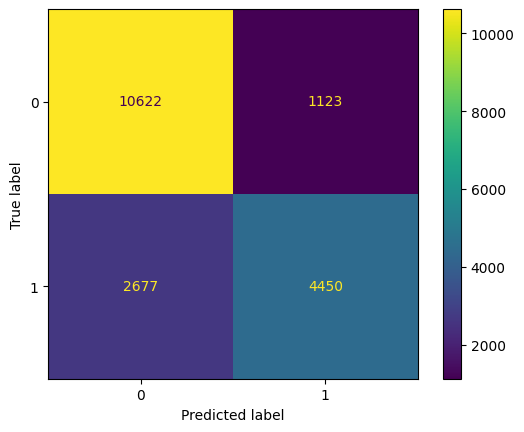

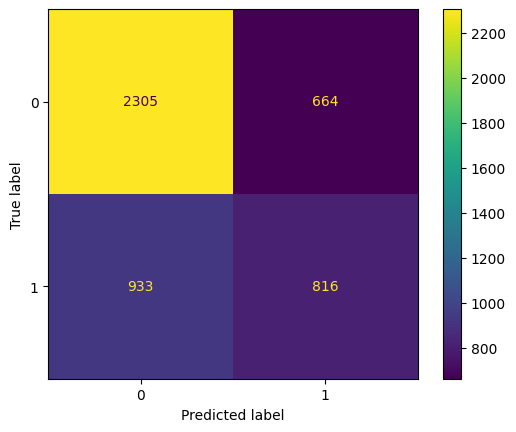

In [28]:
#from Model_evaluation import model_evaluation
model_evaluation(wavenet, specs_train, specs_test, outcomes_train, outcomes_test, threshold=0.60, evaluate=False)